In [1]:
# import libraries for working with .nc
import xarray as xr
import os   
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd



load one year
(binned dataset as an example)

In [2]:
# read 'daily_smoothed_climatology2.nc'
ds_smooth_rel_totCLIM = xr.open_dataset('daily_smoothed_climatology2.nc')


In [3]:
ds_smooth_rel_totCLIM

<xarray.Dataset>
Dimensions:    (latitude: 1248, longitude: 1056, doy: 246)
Coordinates:
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
  * doy        (doy) int64 60 61 62 63 64 65 66 ... 299 300 301 302 303 304 305
Data variables:
    CHL        (doy, latitude, longitude) float32 ...

In [4]:
# select doy = 153
temp = ds_smooth_rel_totCLIM.sel(doy=90).compute()

temp

<xarray.Dataset>
Dimensions:    (latitude: 1248, longitude: 1056)
Coordinates:
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
    doy        int64 90
Data variables:
    CHL        (latitude, longitude) float32 nan nan nan ... 0.1801 0.1815

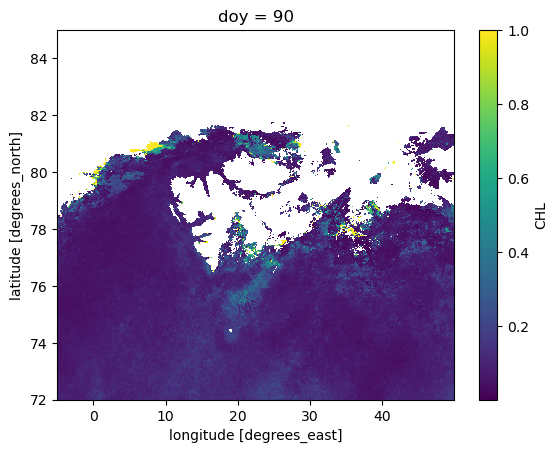

In [5]:
# plot temp
temp.CHL.plot()

In [15]:
#temp as a matrix
t = temp.CHL.values


In [9]:
# Seleziona la variabile CHL
chl_array = ds_smooth_rel_totCLIM['CHL'].compute()

# Trasforma il DataArray in un formato 2D: (num_punti_spaziali, num_doy)
data_2d = chl_array.stack(point=['latitude', 'longitude']).T

# Rimpiazza i valori nulli con 0
data_2d_filled = data_2d.fillna(0)

# Estrai come un array numpy per ulteriori elaborazioni
data_array = data_2d_filled.values

In [10]:
data_array.shape

(1317888, 246)

In [11]:
# Inizializza il clusterer
clusterer = hdbscan.HDBSCAN(min_samples=50, gen_min_span_tree=True)

# Applica il clustering
labels = clusterer.fit_predict(data_array)

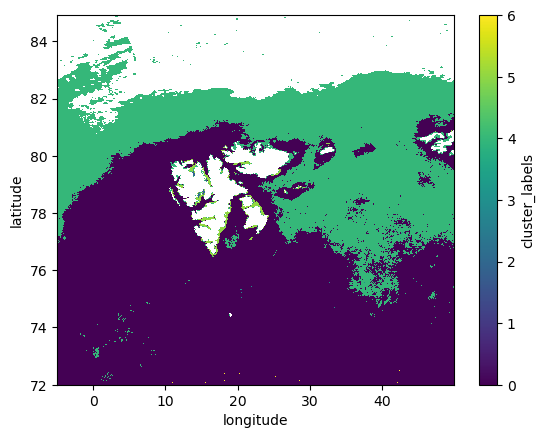

In [14]:
# Assegna le etichette dei cluster al dataset
data_2d_filled['cluster_labels'] = ('point', labels)

# Unstack per ottenere le dimensioni originali (latitude, longitude)
cluster_map = data_2d_filled['cluster_labels'].unstack('point')

# Visualizza la mappa copn colori discreti (non continui)
cluster_map.plot()

In [2]:
from dask.distributed import Client
client = Client() 

import dask.array as da
import xarray as xr

# Carica il tuo dataset come un Dask array
ds_smooth_rel_totCLIM = xr.open_dataset('daily_smoothed_climatology2.nc', chunks={'latitude': 100, 'longitude': 100})

# Estrai la variabile CHL e assicurati che sia un Dask array
chl_array = ds_smooth_rel_totCLIM['CHL'].data

# Assicuriamoci che chl_array sia un Dask array
if not isinstance(chl_array, da.Array):
    chl_array = da.from_array(chl_array, chunks=(246, 100, 100))

# Rimpiazza i NaN con 0
chl_array_filled = da.where(da.isnan(chl_array), 0, chl_array)

# Reshape al formato desiderato
data_2d = chl_array_filled.reshape(chl_array.shape[0], -1).T